# Final Project
##### by Gustavo Fernandes

***

### Problem statement  

This project concerns the well-known Fisher’s Iris data set. You must research the data set 
and write documentation and code (in Python) to investigate it. An online search for 
information on the data set will convince you that many people have investigated it 
previously. You are expected to be able to break this project into several smaller tasks that 
are easier to solve, and to plug these together after they have been completed.  

***

### Importing and Testing the Dataset

Before incitiate the Task, lets import and test the datset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the iris dataset
iris = pd.read_csv('data/iris.data')

#iris.head()

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print(iris)


     sepal_length  sepal_width  petal_length  petal_width         species
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]


In [12]:
#Playing and testing Iris dataset

iris.columns
iris.shape
iris.iloc[5]
print(iris)
iris.loc[iris['species'] == 'Iris-setosa']
iris['species'].value_counts()
sum_iris = iris.groupby('species').sum()
mean_iris = iris.groupby('species').mean()
median_iris = iris.groupby('species').median()
print(sum_iris)
print(mean_iris)
print(median_iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]
                 sepal_length  sepal_width  petal_length  petal_width
species           

***
### Project Task 01: Outputs a summary of each variable to a single text file 

In [13]:
#Group the data by species
grouped_data = iris.groupby('species')

#Outputs a summary of each variable to a single text file
print(grouped_data.describe().to_string(), file=open('iris.summary.txt', 'w'))

***
### Project Task 02: Saves a histogram of each variable to png files

In [14]:
#Saves a histogram of each variable to png files
for species, species_data in grouped_data:
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(f'{species} Histograms')
    for i, column in enumerate(iris.columns[:4]):
        ax = axs[i // 2, i % 2]
        ax.hist(species_data[column])
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    plt.savefig(f'{species}_histograms.png')
    plt.close()


***
### Project Task 03: Outputs a scatter plot of each pair of variables

##### Box and Whisker Plots

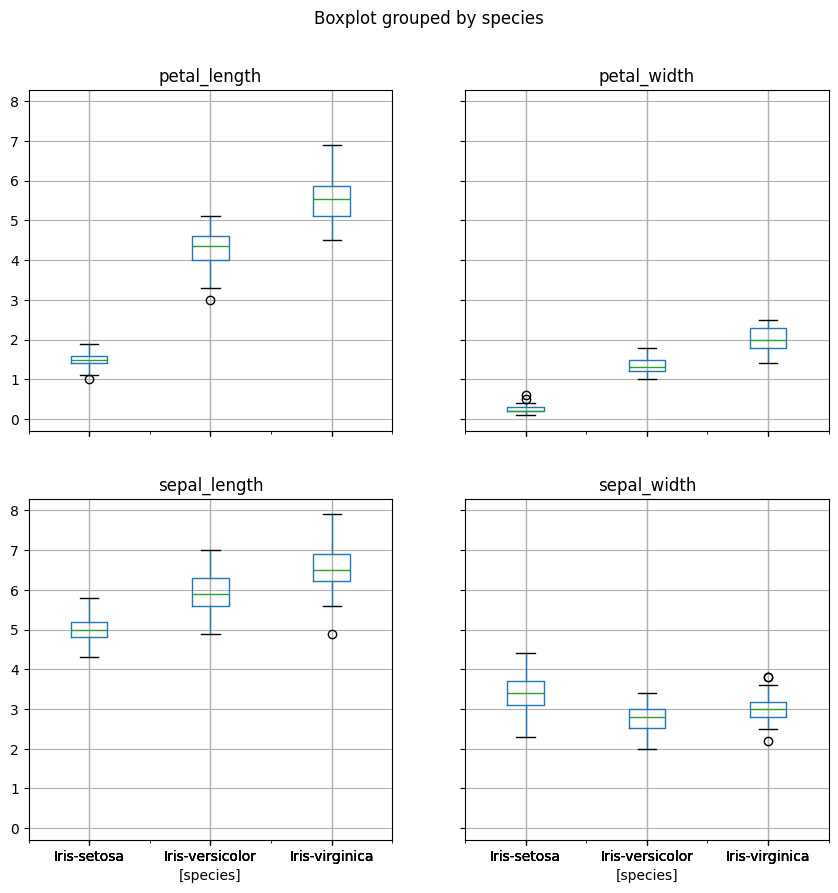

In [15]:
#Box and Whisker Plots
iris.boxplot(by='species', figsize=(10, 10))
plt.savefig('iris_boxplot.png')

In [29]:
species_order = ['Iris-virginica','Iris-setosa','Iris-versicolor' ]
iris['species'] = pd.Categorical(iris['species'], categories=species_order, ordered=True)
iris_species = iris.sort_values('species')
print(iris_species)

     sepal_length  sepal_width  petal_length  petal_width          species
148           5.9          3.0           5.1          1.8   Iris-virginica
120           5.6          2.8           4.9          2.0   Iris-virginica
119           6.9          3.2           5.7          2.3   Iris-virginica
118           6.0          2.2           5.0          1.5   Iris-virginica
117           7.7          2.6           6.9          2.3   Iris-virginica
..            ...          ...           ...          ...              ...
79            5.5          2.4           3.8          1.1  Iris-versicolor
78            5.7          2.6           3.5          1.0  Iris-versicolor
77            6.0          2.9           4.5          1.5  Iris-versicolor
75            6.8          2.8           4.8          1.4  Iris-versicolor
74            6.6          3.0           4.4          1.4  Iris-versicolor

[149 rows x 5 columns]


C:\Users\gusgo\AppData\Local\Temp\ipykernel_12756\3728281183.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris_species.groupby('species')['sepal_length'].plot(kind='hist', legend=True)


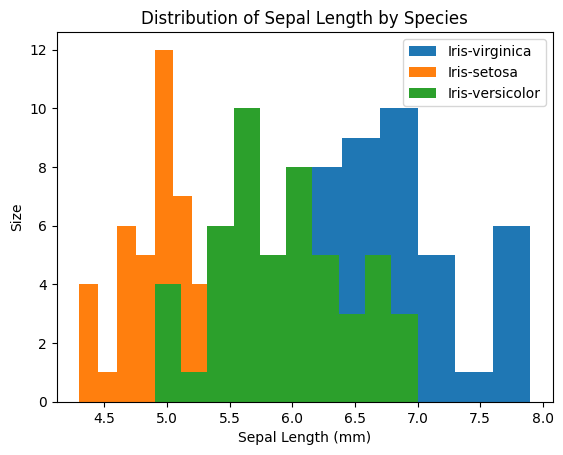

In [30]:
iris_species.groupby('species')['sepal_length'].plot(kind='hist', legend=True)
plt.xlabel('Sepal Length (mm)')
plt.ylabel('Size')
plt.title('Distribution of Sepal Length by Species')
plt.savefig('iris_sepal_length.png')
plt.show()

C:\Users\gusgo\AppData\Local\Temp\ipykernel_12756\3646344741.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris_species.groupby('species')['sepal_width'].plot(kind='hist', legend=True)


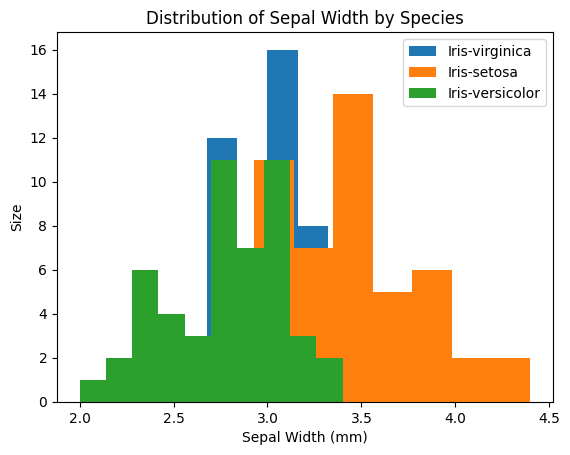

In [33]:
iris_species.groupby('species')['sepal_width'].plot(kind='hist', legend=True)
plt.xlabel('Sepal Width (mm)')
plt.ylabel('Size')
plt.title('Distribution of Sepal Width by Species')
plt.savefig('iris_sepal_width.png')
plt.show()

C:\Users\gusgo\AppData\Local\Temp\ipykernel_12756\1104812684.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris_species.groupby('species')['petal_length'].plot(kind='hist', legend=True)


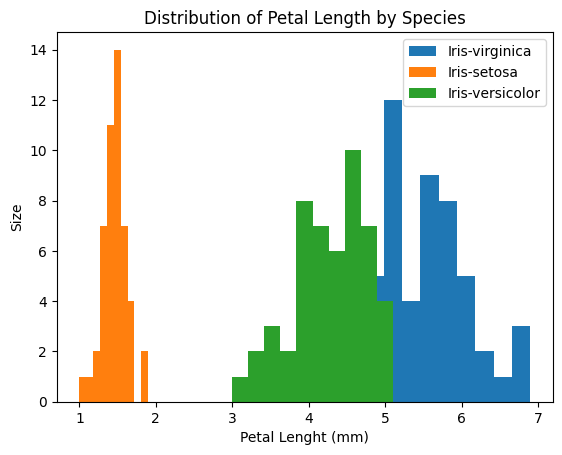

In [34]:
iris_species.groupby('species')['petal_length'].plot(kind='hist', legend=True)
plt.xlabel('Petal Lenght (mm)')
plt.ylabel('Size')
plt.title('Distribution of Petal Length by Species')
plt.savefig('iris_petal_length.png')
plt.show()

C:\Users\gusgo\AppData\Local\Temp\ipykernel_12756\2964872510.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris_species.groupby('species')['petal_width'].plot(kind='hist', legend=True)


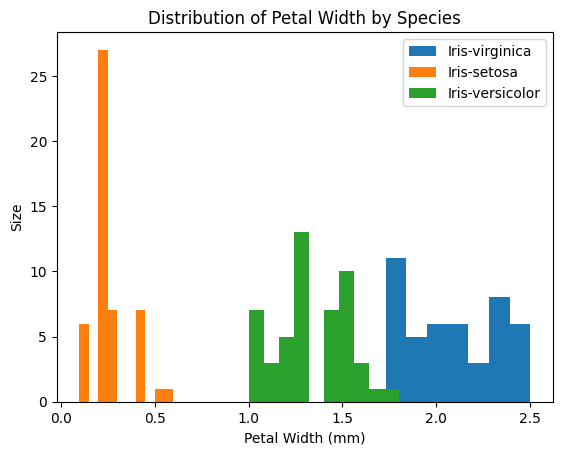

In [35]:
iris_species.groupby('species')['petal_width'].plot(kind='hist', legend=True)
plt.xlabel('Petal Width (mm)')
plt.ylabel('Size')
plt.title('Distribution of Petal Width by Species')
plt.savefig('iris_petal_width.png')
plt.show()

***
## Resource:

https://vlegalwaymayo.atu.ie/

https://archive.ics.uci.edu/dataset/53/iris

https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/

https://github.com/vwalsh86/Iris-Data-Set-Project

***

## End
***